# **4. Statistical_Approaches_to_Estimation_and_Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab datasets/06. remaining_behavior_ext.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 34562 rows and 12 columns.


In [ ]:
df.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,34562.000000,34557.000000,34557.000000,34562.000000,3.456200e+04,34562.000000,34562.000000,34562.000000
mean,17280.500000,20.503248,0.444269,65.281684,2.949855e+04,9.874689,3.604913,15.477548
std,9977.334338,77.836489,0.302218,152.026311,7.973480e+04,64.937144,10.501039,15.359834
min,0.000000,0.000000,0.000714,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,8640.250000,0.372385,0.191011,6.666667,5.280000e+02,1.000000,1.000000,5.000000
50%,17280.500000,2.185226,0.384615,15.000000,5.901000e+03,1.000000,1.000000,10.000000
75%,25920.750000,9.435875,0.666667,58.000000,2.493900e+04,3.000000,2.000000,21.000000
max,34561.000000,2333.627333,1.000000,2800.000000,2.787530e+06,1462.000000,219.000000,178.000000


# **2. Data Preprocessing**

In [ ]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [ ]:
missing_values

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
1117,1117,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
1360,1360,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E
1776,1776,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
10718,10718,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
12348,12348,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E


In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
df[pd.isnull(df).any(axis=1)]

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source


In [ ]:
#lebelencoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Converting categorical variable to numerical labels
le = LabelEncoder()
df['ip_type'] = le.fit_transform(df['ip_type'])
df['behavior'] = le.fit_transform(df['behavior'])
df['behavior_type'] = le.fit_transform(df['behavior_type'])
df['source'] = le.fit_transform(df['source'])


In [ ]:
df.head(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,0.419355,31.0,13040,1,74,3,1.0,1.0,13.0,0
1,51.419393,0.252336,107.0,330113,1,74,3,1.0,1.0,27.0,0
2,25.860775,0.275000,40.0,62066,1,74,3,1.0,1.0,11.0,0
3,0.205909,0.818182,11.0,136,1,74,3,1.0,1.0,9.0,0
4,0.122125,0.812500,16.0,118,1,74,3,1.0,1.0,13.0,0
5,0.100778,0.238095,63.0,381,0,74,3,3.0,1.0,15.0,0
6,15.326789,0.684211,19.0,17473,1,74,3,1.0,1.0,13.0,0
7,0.401190,0.134111,343.0,8257,1,74,3,2.0,1.0,46.0,0
8,15.913862,0.077586,11.6,110761,1,40,1,57.0,10.0,9.0,0
9,0.005437,0.250000,2.0,3,3,55,1,4.0,4.0,2.0,0


# **UNIVARIATE METHODS: MEASURES OF CENTER AND SPREAD**

## **Measures of center and spread**

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')


colors = plotly.colors.DEFAULT_PLOTLY_COLORS


def create_box_trace(col, visible=False):
    return go.Box(
        y=df[col],
        name=col,
        marker = dict(color = colors[0]),
        visible=visible,
    )

features_not_for_hist = ["source"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(df[col].unique())>5]

active_idx = 0
box_traces = [(create_box_trace(col) if i != active_idx else create_box_trace(col, visible=True)) for i, col in enumerate(features_for_box)]

data = box_traces

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')

Output hidden; open in https://colab.research.google.com to view.

## **Estimation**

### **Confidence Interval Estimate- Example**




In [ ]:
import numpy as np
import scipy.stats as st

confidence_level = 0.95
st.t.interval(confidence_level, df=len(df['behavior'])-1, loc=np.mean(df['behavior']), scale=st.sem(df['behavior']))

(68.80674045559452, 68.9917665752486)

In [ ]:
kellogs = df[df["source"]==0]

In [ ]:
kellogs['behavior'].describe()

count    17918.000000
mean        72.493526
std          7.042733
min          0.000000
25%         74.000000
50%         74.000000
75%         74.000000
max         74.000000
Name: behavior, dtype: float64

In [ ]:
confidence_level = 0.95
st.t.interval(confidence_level, df=len(kellogs['behavior'])-1, loc=np.mean(kellogs['behavior']), scale=st.sem(kellogs['behavior']))

(72.39039870775765, 72.59665341859572)

In [ ]:
import numpy as np
import scipy.stats as st

confidence_level = 0.95

# Assuming df is your DataFrame
for column in df.columns:
    confidence_interval = st.t.interval(
        confidence_level,
        df=len(df[column]) - 1,
        loc=np.mean(df[column]),
        scale=st.sem(df[column])
    )
    print(f"Confidence Interval for {column}: {confidence_interval}")

Confidence Interval for inter_api_access_duration(sec): (19.682678217409126, 21.32381841417999)
Confidence Interval for api_access_uniqueness: (0.44108305791511676, 0.44745516318659934)
Confidence Interval for sequence_length(count): (63.678871507659, 66.8844958052698)
Confidence Interval for vsession_duration(min): (28657.910396393323, 30339.1971783998)
Confidence Interval for ip_type: (1.0573877212352694, 1.0654060985668254)
Confidence Interval for behavior: (68.80674045559452, 68.9917665752486)
Confidence Interval for behavior_type: (2.657701341296079, 2.6693051976773603)
Confidence Interval for num_sessions: (9.19005719339395, 10.55932073612402)
Confidence Interval for num_users: (3.494200546480241, 3.7156252737847906)
Confidence Interval for num_unique_apis: (15.31560898793514, 15.639486203315368)
Confidence Interval for source: (0.47630136407801915, 0.48683734317271865)


# **BIVARIATE METHODS**

# **Regression**

<Axes: xlabel='inter_api_access_duration(sec)', ylabel='behavior'>

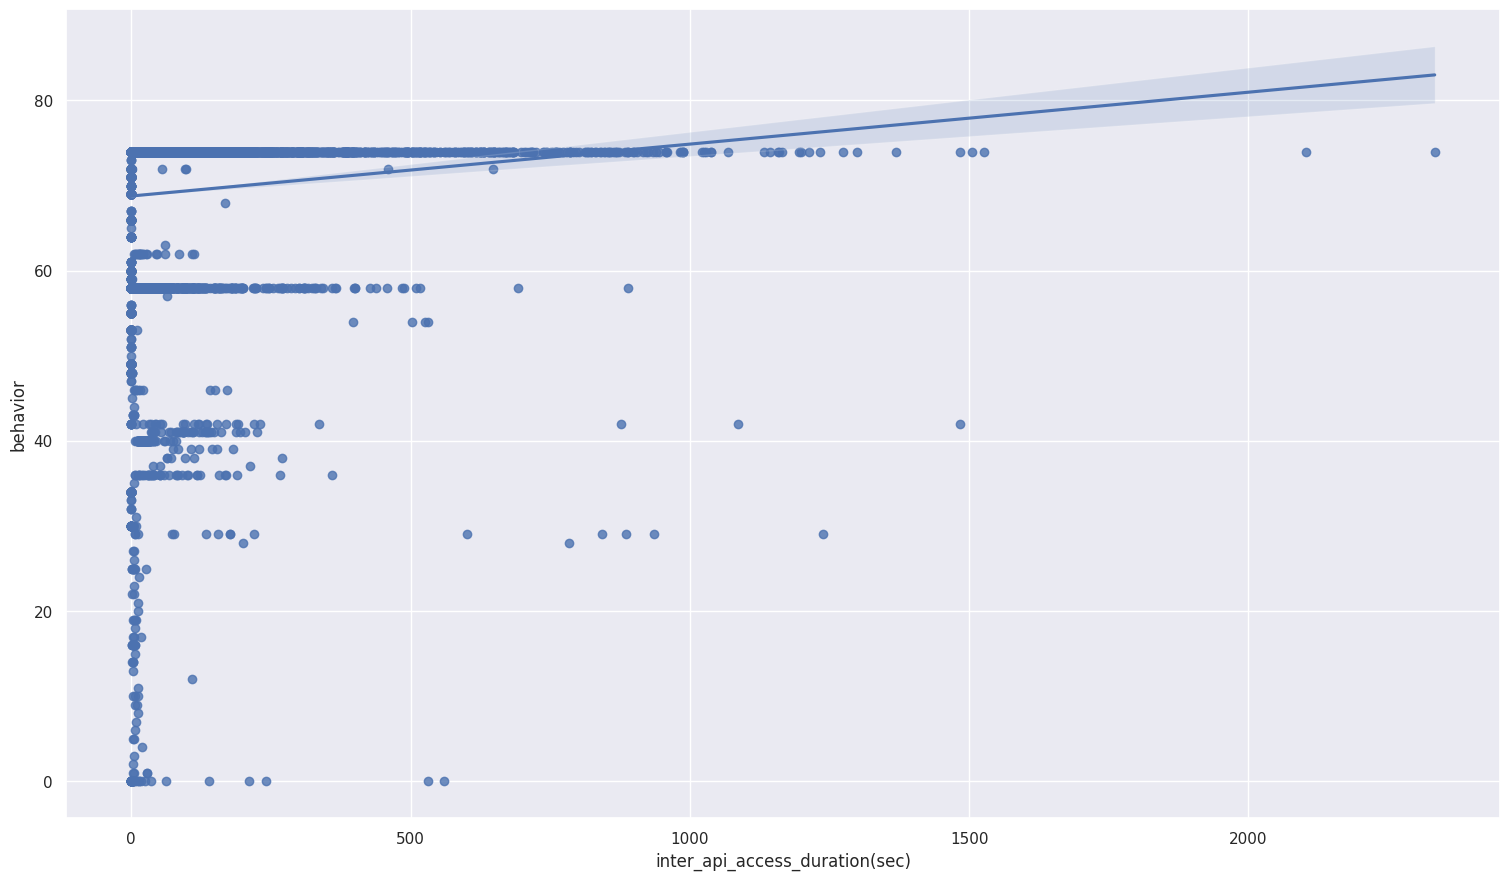

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x="inter_api_access_duration(sec)", y="behavior", data=df, ax=ax)

## **Regression - Calculation**

In [ ]:
# implementing the regression equation
def regression_equation(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    x_squared = (x**2).sum()
    xy = (x*y).sum()
    std_dev = x.std()
    var_x = std_dev ** 2
    cov_xy = (xy - len(x)*x_mean*y_mean)/(len(x)-1)
    b_1 = cov_xy/var_x
    b_0 = y_mean - b_1*x_mean
    print('Regression equation is: %.3f %.3f (x)' % (b_0, b_1))
    y_hat = b_0+b_1*x
    return y_hat


In [ ]:
pred = regression_equation(df['inter_api_access_duration(sec)'], df['behavior'])
print(pred)

Regression equation is: 68.774 0.006 (x)
0        68.816958
1        69.087817
2        68.931930
3        68.775456
4        68.774945
           ...    
34557    68.774389
34558    68.788232
34559    68.776599
34560    68.776608
34561    68.846327
Name: inter_api_access_duration(sec), Length: 34562, dtype: float64


## **Residuals**


In [ ]:
pred_behavior = pd.DataFrame()

pred_behavior['source'] = df['source']#0=ecommerce,1=financial_services
pred_behavior['Actual behavior']  = df['behavior']
pred_behavior['Predicted behavior'] =  pred
pred_behavior['Predicted Error'] = df['behavior'] - pred

In [ ]:
pred_behavior.head(20)

,source,Actual behavior,Predicted behavior,Predicted Error
0,0,74,68.816958,5.183042
1,0,74,69.087817,4.912183
2,0,74,68.931930,5.068070
3,0,74,68.775456,5.224544
4,0,74,68.774945,5.225055
5,0,74,68.774815,5.225185
6,0,74,68.867681,5.132319
7,0,74,68.776647,5.223353
8,0,40,68.871262,-28.871262
9,0,55,68.774234,-13.774234


## **New Prediction**



In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook


layout = dict(
    yaxis=dict(
        title='behavior',
        automargin=True,
    ),
    xaxis=dict(
        title='Feature: inter_api_access_duration(sec)',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)

# Add traces
fig.add_trace(go.Scatter(x=df['inter_api_access_duration(sec)'], y=df['behavior'],
                    mode='markers',
                    name='behavior'))
fig.add_trace(go.Scatter(x=df['inter_api_access_duration(sec)'], y=(68.775+0.006*df['inter_api_access_duration(sec)']),
                    mode='lines',
                    name='Regression'))


fig.show()

Output hidden; open in https://colab.research.google.com to view.

## **MULTIPLE REGRESSION**

In [ ]:
#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook

from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

colors = plotly.colors.DEFAULT_PLOTLY_COLORS

def create_scatter_trace(x, y, visible=False):
    return go.Scatter(x=df[x], y=df[y],
                    mode='markers',
                    name=y.title(),
                    marker = dict(
                        size=8,
                    ),
                    visible=visible)

def create_line_trace(x,y, visible=False):
    return go.Scatter(x=df[x], y=regression_equation(df[x],df[y]),
                    mode='lines',
                    name='Regression',
                    visible=visible)

features_not_for_reg = ["source","behavior"]
features_for_reg = [x for x in df.columns if x not in features_not_for_reg]
active_idx = 0

traces_scatter = [(create_scatter_trace(col,'behavior') if i != active_idx else create_scatter_trace(col,'behavior', visible=True)) for i, col in enumerate(features_for_reg)]
traces_line = [(create_line_trace(col,'behavior') if i != active_idx else create_line_trace(col,'behavior', visible=True)) for i, col in enumerate(features_for_reg)]

data = traces_scatter + traces_line

n_features = len(features_for_reg)

steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
        label = features_for_reg[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ",
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='source',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='regression_slider')

Output hidden; open in https://colab.research.google.com to view.

## **Correlation Coefficients**


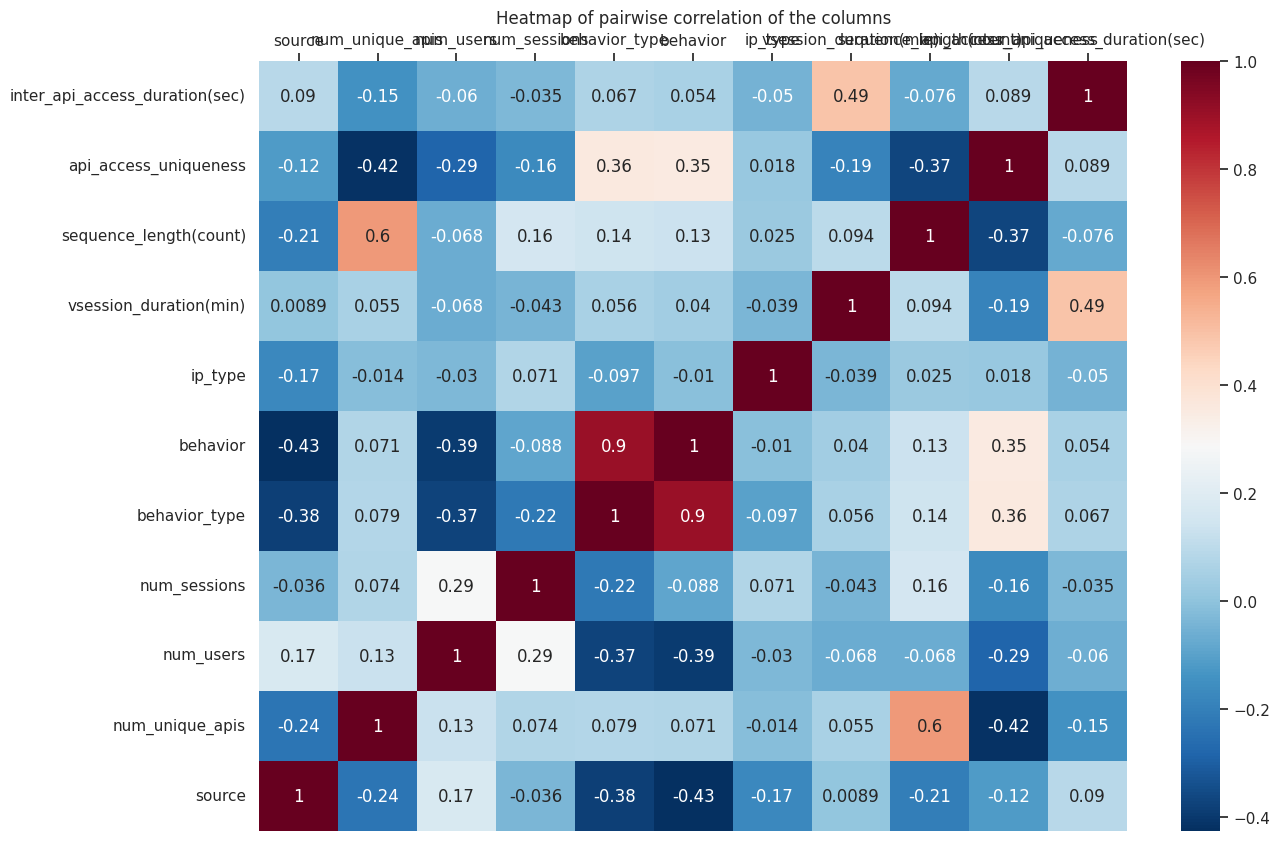

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(14, 10))

corr = df.corr()

ax = sns.heatmap(corr, cmap = "RdBu_r", annot=True)#in the figure  we want value

ax.invert_xaxis()

ax.xaxis.set_ticks_position('top')

plt.title("Heatmap of pairwise correlation of the columns")

plt.show()